# Alzheimer's image classification using DrillBitVi 

In [17]:
# !pip install drillvision
# !pip install git+https://github.com/Atashnezhad/DrillBitVision.git/@feature/bug_2
# !pip install git+https://github.com/Atashnezhad/DrillBitVision.git@feature/fix_bug
# ! pip install git+https://github.com/Atashnezhad/DrillBitVision.git

In [18]:
from pathlib import Path
from neural_network_model.process_data import Preprocessing
from neural_network_model.bit_vision import BitVision
from neural_network_model.transfer_learning import TransferModel
from neural_network_model.visual_insights import ImageNumeric

In [19]:
# !rm -r dataset
# !rm -r figures
# !rm -r models

# !ls -la

# !mkdir dataset
# !mkdir models
# !mkdir figures

# !cp -r /kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s\ Dataset/train/* ./dataset
# # !cp -r /kaggle/input/filtered-ad/filtered_dataset_ad/* ./dataset
# # !cp -r /kaggle/input/ad-lbp-filter-grey/filtered_dataset_ad_lbp/* ./dataset
# # !cp -r /kaggle/input/filtered-lbp-seismic/filtered_dataset_ad_lbp/* ./dataset
# # !cp -r /kaggle/input/segmented-ad-kmean-seismic/segmentation_dataset_ad_kmean/* ./dataset
# # !cp -r /kaggle/input/segmented-ad-kmean-3-cmap-viridis/segmentation_dataset_ad_kmean_3/* ./dataset
# # !cp -r /kaggle/input/edited-ad-cmap-sismic/edited_dataset_ad/* ./dataset


# !tree -L 2

In [20]:
dataset_address=Path("__file__").parent / "dataset"

2023-09-02 12:23:21,273 - INFO - Data was prepared


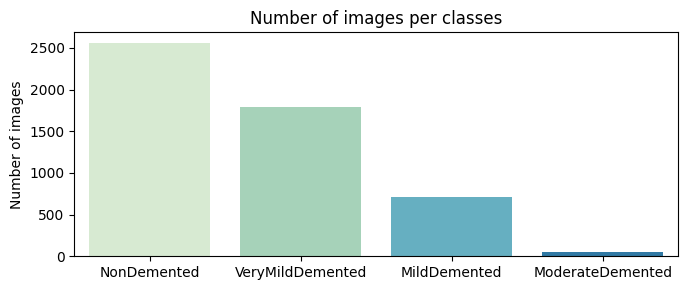

2023-09-02 12:23:21,436 - INFO - number of images belong to MildDemented: 717
2023-09-02 12:23:21,437 - INFO - number of images belong to ModerateDemented: 52
2023-09-02 12:23:21,437 - INFO - number of images belong to NonDemented: 2560
2023-09-02 12:23:21,438 - INFO - number of images belong to VeryMildDemented: 1792


In [21]:
transfer_model = TransferModel(
        dataset_address=dataset_address
    )

transfer_model.plot_classes_number(
    figsize=(7, 3),
    figure_folder_path=Path("__file__").parent / "test",
    palette="GnBu"
)

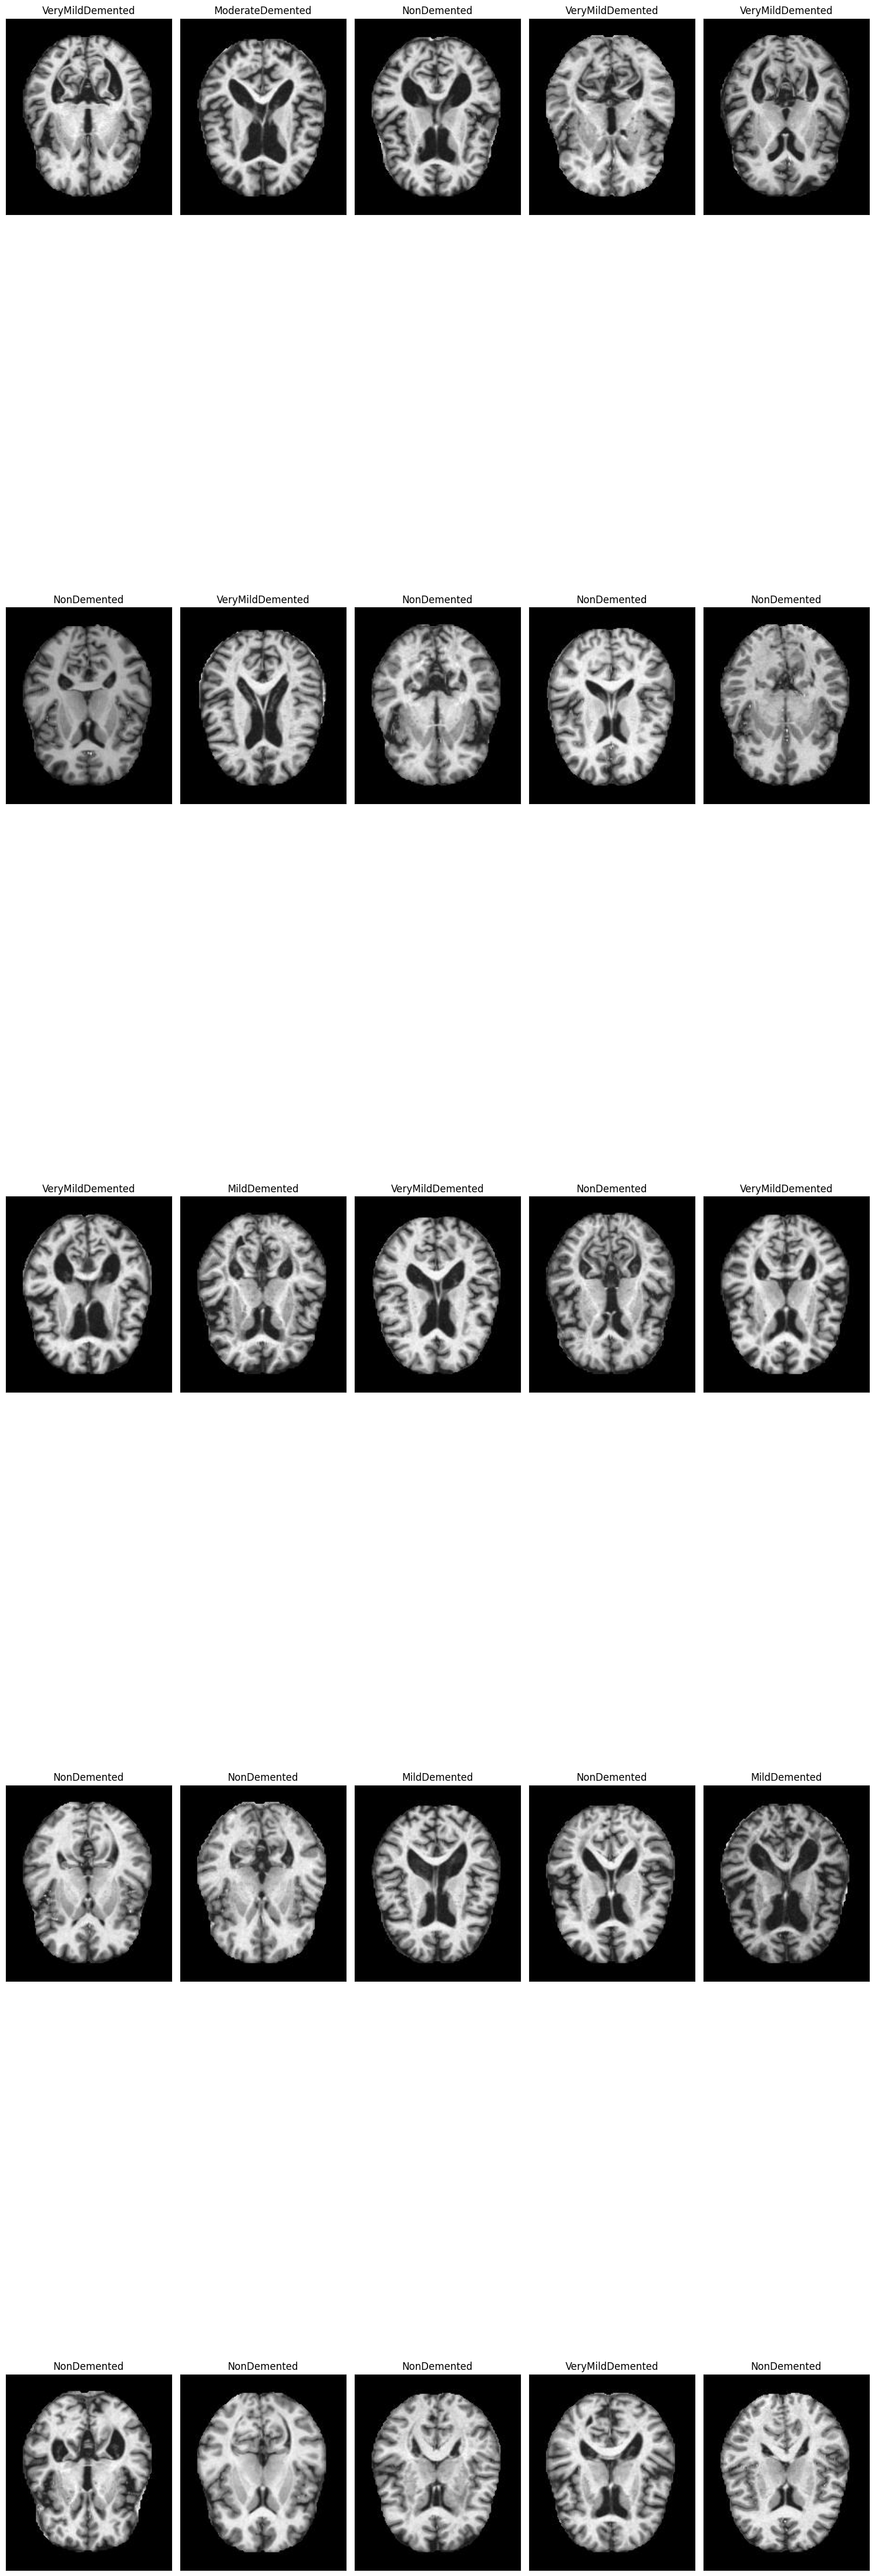

In [36]:
transfer_model.plot_data_images(
    figure_folder_path=Path("__file__").parent / "figures",
    num_cols=5,
    num_rows=5,
    figsize=(15,55)
)

In [25]:
transfer_model.train_model(
        epochs=100,
        model_save_path=(Path("__file__").parent / "models").resolve(),
        model_name="tf_model_1.h5"
    )

9406464/9406464 [==============================] - 0s 0us/step
Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.
Epoch 1/100
130/130 [==============================] - 16s 32ms/step - loss: 0.9509 - categorical_accuracy: 0.5506 - val_loss: 0.8990 - val_categorical_accuracy: 0.6043
Epoch 2/100
130/130 [==============================] - 4s 27ms/step - loss: 0.8078 - categorical_accuracy: 0.6230 - val_loss: 0.7815 - val_categorical_accuracy: 0.6435
Epoch 3/100
130/130 [==============================] - 4s 28ms/step - loss: 0.7522 - categorical_accuracy: 0.6615 - val_loss: 0.7576 - val_categorical_accuracy: 0.6326
Epoch 4/100
130/130 [==============================] - 4s 30ms/step - loss: 0.6820 - categorical_accuracy: 0.6953 - val_loss: 0.7051 - val_categorical_accuracy: 0.6739
Epoch 5/100
130/130 [==============================] - 4s 27ms/step - loss: 0.6280 

2023-09-02 12:24:57,995 - INFO - Plotting metric: val_loss and title: Loss
2023-09-02 12:24:58,048 - INFO - Plotting metric: val_categorical_accuracy and title: Categorical_accuracy


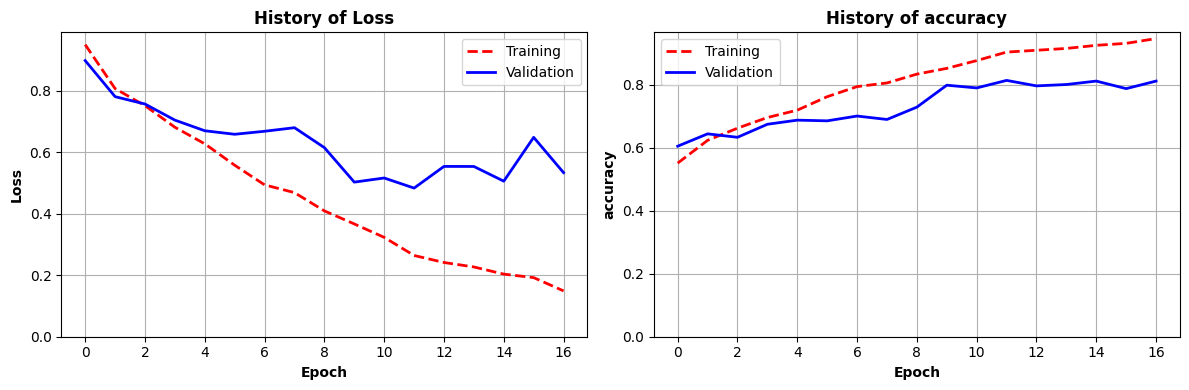

In [26]:
transfer_model.plot_metrics_results()

In [34]:
transfer_model.results()

Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.


 ## Test Loss: 0.43008

## Accuracy on the test set: 79.34%

 ## Test Loss: 0.43008
## Accuracy on the test set: 79.34%


Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.
17/17 [==============================] - 1s 23ms/step
The first ... predictions: ['NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented']


classification_report
                   precision    recall  f1-score   support

    MildDemented       0.68      0.76      0.72        72
ModerateDemented       1.00      1.00      1.00         5
     NonDemented       0.86      0.83      0.84       256
VeryMildDemented       0.75      0.75      0.75       180

        accuracy                           0.79       513
       macro avg       0.82      0.84      0.83       513
    weighted avg       0.80      0.79      0.79       513



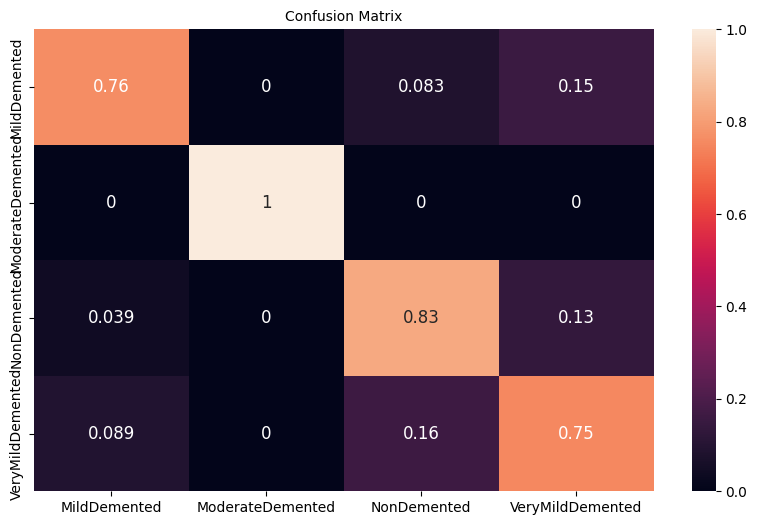

In [28]:
report = transfer_model.predict_test(normalize="true")

In [29]:
transfer_model.model_history.history.items()

dict_items([('loss', [0.9508613348007202, 0.8077638745307922, 0.7521637082099915, 0.6819682717323303, 0.6279877424240112, 0.5583311319351196, 0.4944004714488983, 0.4691104590892792, 0.4096451699733734, 0.3671547472476959, 0.32344862818717957, 0.2645163834095001, 0.24166451394557953, 0.2271147519350052, 0.20380663871765137, 0.19242620468139648, 0.14914800226688385]), ('categorical_accuracy', [0.550626814365387, 0.6229507923126221, 0.6615236401557922, 0.695274829864502, 0.7186595797538757, 0.761330783367157, 0.7933943867683411, 0.8049662709236145, 0.8329315185546875, 0.8512536287307739, 0.8758437633514404, 0.9028447270393372, 0.9086306691169739, 0.9144166111946106, 0.9243008494377136, 0.9305689334869385, 0.9457569718360901]), ('val_loss', [0.8989670276641846, 0.781520664691925, 0.75755375623703, 0.7051428556442261, 0.6704981923103333, 0.659080445766449, 0.6688664555549622, 0.6805061101913452, 0.6156118512153625, 0.5033113956451416, 0.5167526602745056, 0.48389866948127747, 0.5544771552085

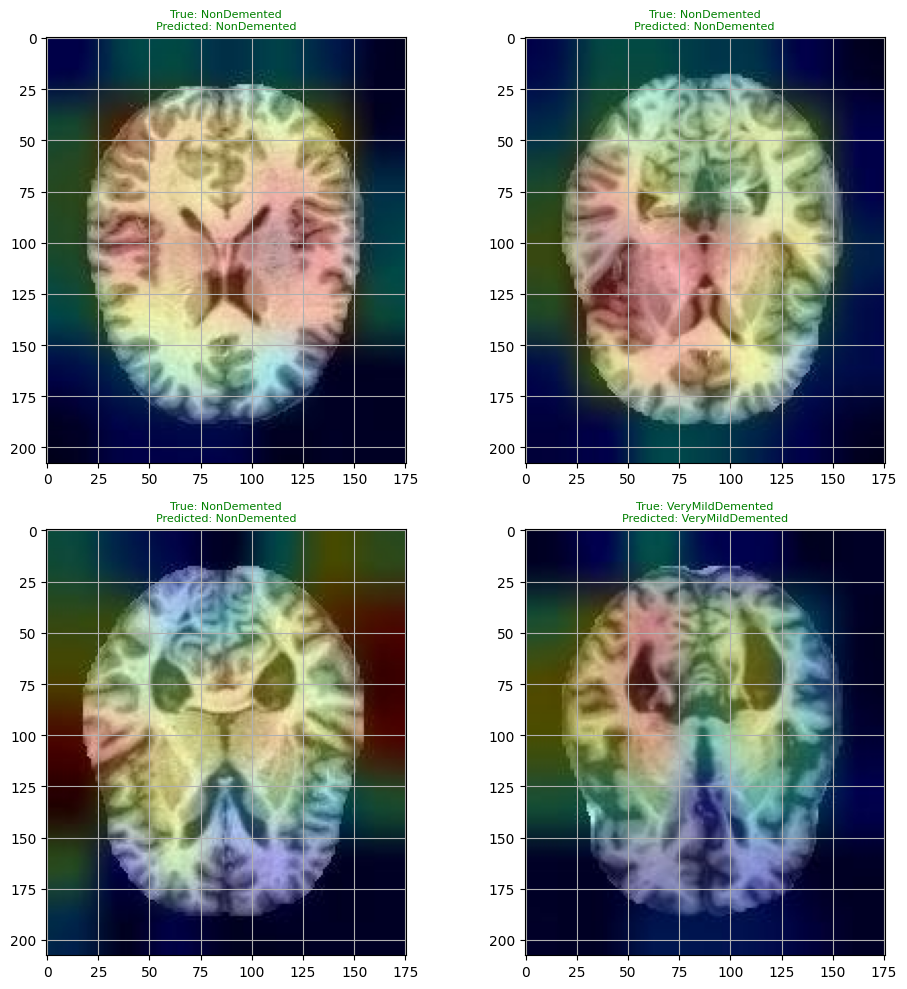

In [32]:
transfer_model.grad_cam_viz(num_rows=2, num_cols=2, figsize=(10,10), title_lable_size=8)

# Supervise module

In [35]:
# dataset_path = (Path("__file__").parent / "dataset").resolve()
# obj_super = SuperviseLearning(dataset_address=dataset_path)

# !mkdir filtered_dataset_path

# filtered_dataset_path = (Path("__file__").parent / "filtered_dataset_path").resolve()
# print(obj_super.image_df.head())
# obj_super.filter_images(
#     dataset_path=dataset_path,
#     filtered_dataset_path=filtered_dataset_path,
#     replace_existing=True
# )

# # transfer_model = TransferModel(
# #         dataset_address=Path("__file__").parent / "filtered_dataset"
# #     )

# transfer_model.plot_data_images(
#     figure_folder_path=Path("__file__").parent / "figures_filtered",
#     num_cols=5,
#     num_rows=20,
#     figsize=(15,55)
# )


# transfer_model.train_model(
#         epochs=100,
#         model_save_path=(Path("__file__").parent / "models").resolve(),
#         model_name="tf_model_1.h5"
#     )

# transfer_model.plot_metrics_results()

# transfer_model.predict_test(normalize="true")

# transfer_model.grad_cam_viz(num_rows=5, num_cols=5, figsize=(10,10), title_lable_size=8)